<a href="https://colab.research.google.com/github/tithinosrat/ai-lab/blob/main/labtask6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score


In [ ]:
import numpy
import matplotlib.pyplot as plt


X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

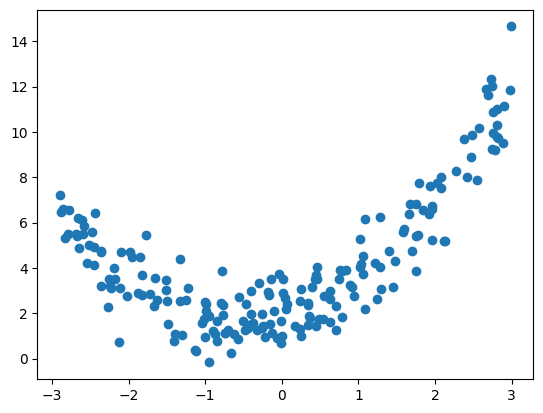

In [ ]:

plt.scatter(X, y)
plt.show()


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:

y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.2876638571970632

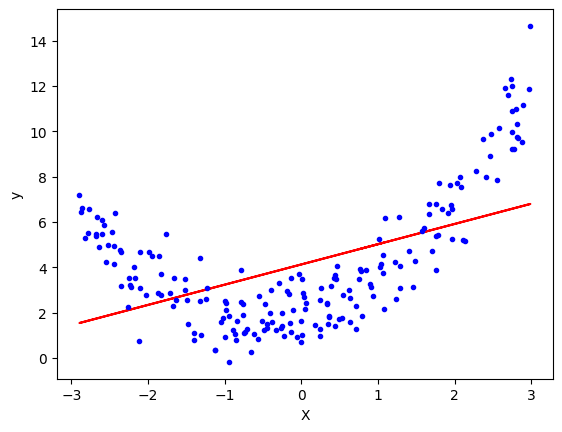

In [ ]:

plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:

#polynomial transformation
poly = PolynomialFeatures(degree=2,include_bias=True) #hyperparameter is degree

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [ ]:

X_train_trans.shape

In [ ]:

print(X_train[0])
print(X_train_trans[0])

[1.06603015]
[1.         1.06603015 1.13642027]


In [ ]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)


LinearRegression()

In [ ]:

print(lr.coef_)
print(lr.intercept_)

[[0.         0.85698406 0.80399411]]
[1.96539215]


In [ ]:

y_pred = lr.predict(X_test_trans)

In [ ]:

r2_score(y_test,y_pred)

0.8764513587388428

In [ ]:

X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

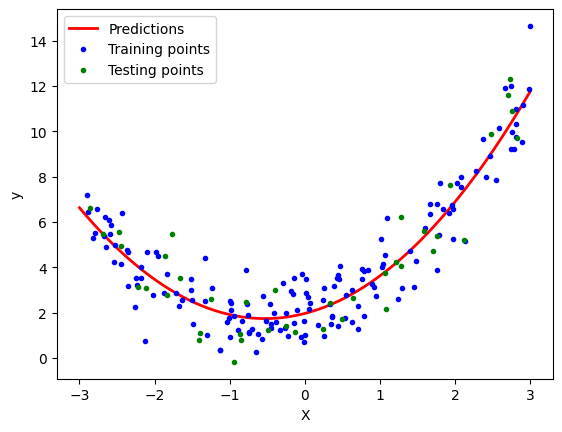

In [ ]:

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


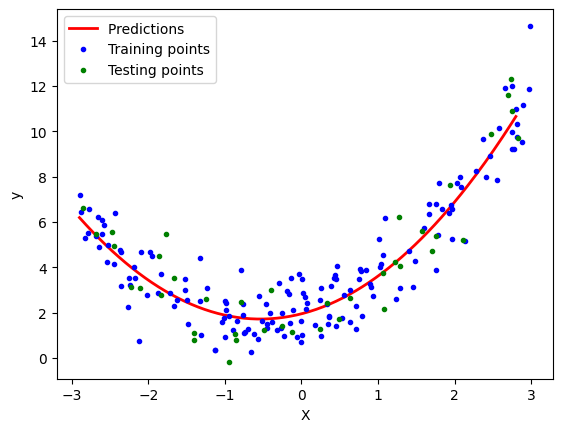

0.8763999712386941


In [ ]:

# Applying Gradient Descent
sgd = SGDRegressor(max_iter=1000)
sgd.fit(X_train_trans,y_train)
y_pred = sgd.predict(X_test_trans)


X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)


plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions ")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

print(r2_score(y_test,y_pred))